In [247]:
# import packages/modules
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import json
import config
from sodapy import Socrata
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures

In [260]:
all_regents_grad_rate = pd.read_csv('all_regents_grad_rate.csv')
all_regents_grad_rate = all_regents_grad_rate.drop(columns=['Unnamed: 0'])
all_regents_grad_rate.columns

Index(['school_name', 'Common Core Algebra2', 'percent_graduated',
       'Common Core Algebra', 'Common Core English', 'Common Core Geometry',
       'Global History and Geography', 'Biology', 'Earth Science',
       'U.S. History and Government', 'Chemistry', 'Physics'],
      dtype='object')

In [261]:
all_regents_grad_rate.columns = [col.replace(' ', '_') for col in all_regents_grad_rate.columns]
all_regents_grad_rate.columns = [col.replace('.', '_') for col in all_regents_grad_rate.columns]

In [262]:
all_regents_grad_rate.columns

Index(['school_name', 'Common_Core_Algebra2', 'percent_graduated',
       'Common_Core_Algebra', 'Common_Core_English', 'Common_Core_Geometry',
       'Global_History_and_Geography', 'Biology', 'Earth_Science',
       'U_S__History_and_Government', 'Chemistry', 'Physics'],
      dtype='object')

In [263]:
all_regents_grad_rate = all_regents_grad_rate.replace(0, 0.001)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2aa0d350>,
      dtype=object)

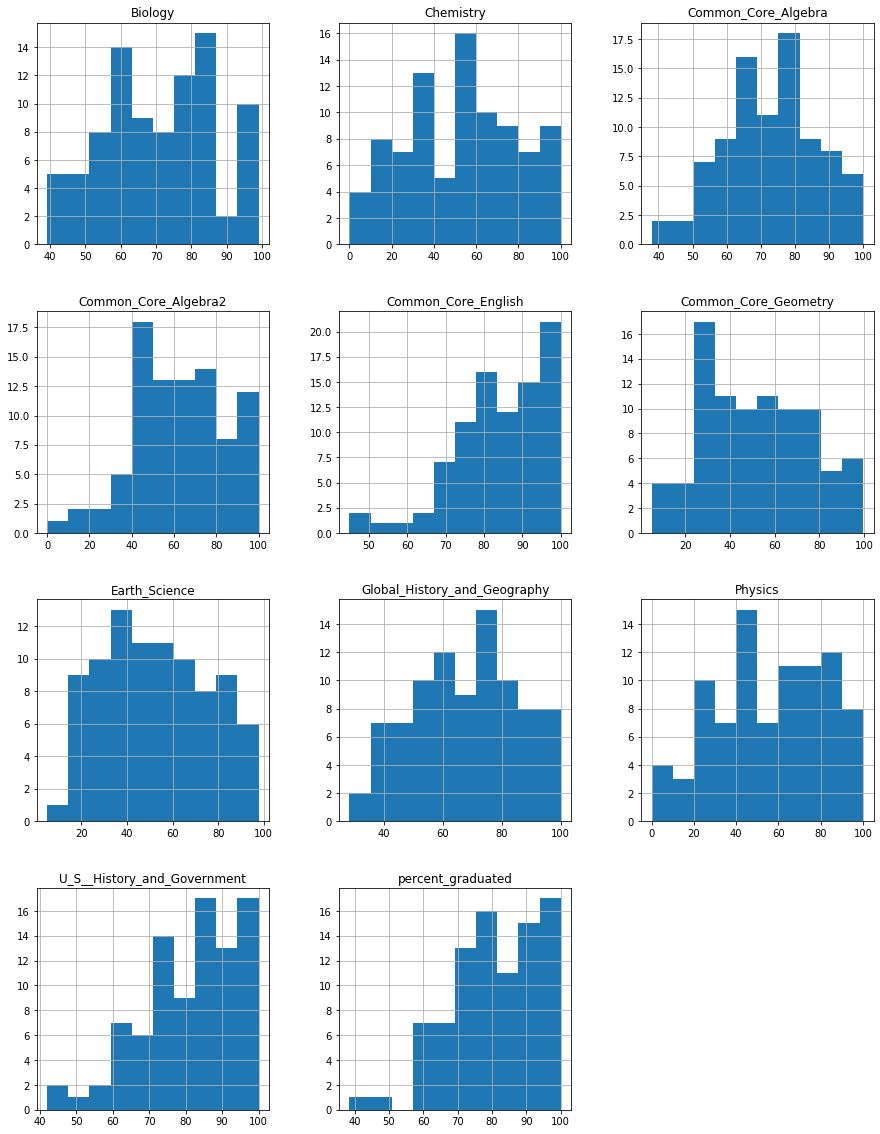

In [264]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
all_regents_grad_rate.hist(ax = ax)

In [265]:
log_cols = ['Common_Core_Algebra','Common_Core_Algebra2', 'percent_graduated','Common_Core_English', 'Common_Core_Geometry',
       'Global_History_and_Geography', 'Biology', 'Earth_Science',
       'U_S__History_and_Government', 'Chemistry', 'Physics']
for cols in log_cols:
    all_regents_grad_rate[cols] = np.log(all_regents_grad_rate[cols])
all_regents_grad_rate

,school_name,Common_Core_Algebra2,percent_graduated,Common_Core_Algebra,Common_Core_English,Common_Core_Geometry,Global_History_and_Geography,Biology,Earth_Science,U_S__History_and_Government,Chemistry,Physics
0,Pace High School,4.021774,4.373238,4.298645,4.552824,3.202746,4.290459,4.157319,3.858622,4.547541,3.981549,2.406945
1,The High School For Language And Diplomacy,3.927896,4.382027,4.171306,4.366913,3.226844,3.958907,4.141546,3.708682,4.276666,3.049273,3.912023
2,High School for Environmental Studies,3.822098,4.339902,4.130355,4.407938,3.711130,3.939638,4.034241,3.698830,4.337291,3.077312,4.009150
3,High School for Health Professions and Human S...,4.355426,4.476200,4.424847,4.520701,4.185099,4.332048,4.369448,3.421000,4.449685,4.341205,4.268298
4,Manhattan Village Academy,4.605170,4.570579,4.565389,4.605170,4.526127,4.561218,4.575741,4.530447,4.597138,4.432007,4.605170
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Gaynor McCown Expeditionary Learning School,3.912023,4.514151,4.284965,4.588024,4.041295,4.265493,4.273884,3.618993,4.449685,2.901422,4.044804
84,New Dorp High School,4.360548,4.364372,4.228293,4.476200,3.822098,4.247066,4.324133,3.881564,4.442651,4.316154,4.082609
85,Port Richmond High School,4.079231,4.192680,4.298645,4.318821,3.618993,3.895894,4.039536,2.901422,4.222445,3.549617,3.481240
86,Curtis High School,4.125520,4.269697,4.092677,4.304065,3.678829,3.891820,4.089332,3.732896,4.317488,3.975936,4.087656


In [266]:
outcome = "percent_graduated"
x_cols = ['Common_Core_Algebra2','Common_Core_Algebra', 'Common_Core_English', 'Common_Core_Geometry','Global_History_and_Geography', 'Biology', 'Earth_Science','U_S__History_and_Government', 'Chemistry', 'Physics']

In [267]:
for col in x_cols:
    all_regents_grad_rate[col] = (all_regents_grad_rate[col] - all_regents_grad_rate[col].mean())/all_regents_grad_rate[col].std()
all_regents_grad_rate

,school_name,Common_Core_Algebra2,percent_graduated,Common_Core_Algebra,Common_Core_English,Common_Core_Geometry,Global_History_and_Geography,Biology,Earth_Science,U_S__History_and_Government,Chemistry,Physics
0,Pace High School,0.053978,4.373238,0.136203,0.831701,-1.044131,0.386822,-0.331326,0.035760,0.899446,0.228354,-0.744868
1,The High School For Language And Diplomacy,-0.021602,4.382027,-0.502035,-0.337126,-1.002983,-0.760429,-0.399894,-0.242478,-0.590850,-0.310837,0.130435
2,High School for Environmental Studies,-0.106779,4.339902,-0.707283,-0.079200,-0.176020,-0.827103,-0.866360,-0.260761,-0.257306,-0.294620,0.186921
3,High School for Health Professions and Human S...,0.322597,4.476200,0.768737,0.629744,0.633325,0.530729,0.590814,-0.776319,0.361065,0.436365,0.337633
4,Manhattan Village Academy,0.523664,4.570579,1.473151,1.160805,1.215661,1.323712,1.487590,1.282438,1.172318,0.488881,0.533546
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Gaynor McCown Expeditionary Learning School,-0.034381,4.514151,0.067637,1.053006,0.387767,0.300432,0.175392,-0.408910,0.361065,-0.396349,0.207656
84,New Dorp High School,0.326721,4.364372,-0.216411,0.349964,0.013468,0.236669,0.393825,0.078332,0.322365,0.421877,0.229642
85,Port Richmond High School,0.100236,4.192680,0.136203,-0.639484,-0.333352,-0.978469,-0.843339,-1.740481,-0.889165,-0.021458,-0.120094
86,Curtis High School,0.137503,4.269697,-0.896131,-0.732252,-0.231177,-0.992564,-0.626873,-0.197545,-0.366256,0.225108,0.232577


In [268]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=all_regents_grad_rate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percent_graduated   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     16.90
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.04e-15
Time:                        11:59:33   Log-Likelihood:                 79.184
No. Observations:                  88   AIC:                            -136.4
Df Residuals:                      77   BIC:                            -109.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.3740      0.011    390.078      0.000       4.352       4.396
Common_Core_Algebra2             0.0031      0.016      0.189      0.851      -0.029       0.036
Common_Core_Algebra              0.0320      0.024      1.308      0.195      -0.017       0.081
Common_Core_English              0.0632      0.017      3.618      0.001       0.028       0.098
Common_Core_Geometry            -0.0020      0.019     -0.103      0.918      -0.040       0.036
Global_History_and_Geography     0.0205      0.021      0.966      0.337      -0.022       0.063
Biology                          0.0260      0.023      1.113      0.269      -0.021       0.073
Earth_Science                   -0.0107      0.017     -0.622      0.536      -0.045       0.024
U_S__History_and_Government      0.0360      0.018      1.988      0.050   -6.14e-05       0.072
Chemistry                        0.0256      0.016      1.650      0.103      -0.005       0.057
Physics                         -0.0393      0.015     -2.628      0.010      -0.069      -0.010
==============================================================================
Omnibus:                        5.748   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                8.715
Skew:                          -0.090   Prob(JB):                       0.0128
Kurtosis:                       4.531   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
# Fitting the actual model
outcome = "percent_graduated"
x_cols = ['Common_Core_Algebra', 'Common_Core_English', 'U_S__History_and_Government']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=all_regents_grad_rate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percent_graduated   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     52.51
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           3.26e-19
Time:                        12:01:21   Log-Likelihood:                 74.547
No. Observations:                  88   AIC:                            -141.1
Df Residuals:                      84   BIC:                            -131.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.3740      0.011    386.512      0.000       4.352       4.397
Common_Core_Algebra             0.0497      0.016      3.118      0.002       0.018       0.081
Common_Core_English             0.0698      0.015      4.644      0.000       0.040       0.100
U_S__History_and_Government     0.0468      0.015      3.047      0.003       0.016       0.077
==============================================================================
Omnibus:                        4.124   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.706
Skew:                          -0.132   Prob(JB):                       0.0951
Kurtosis:                       4.102   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
all_regents_grad_rate.columns

Index(['school_name', 'Common_Core_Algebra2', 'percent_graduated',
       'Common_Core_Algebra', 'Common_Core_English', 'Common_Core_Geometry',
       'Global_History_and_Geography', 'Biology', 'Earth_Science',
       'U_S__History_and_Government', 'Chemistry', 'Physics'],
      dtype='object')

In [277]:
all_regents_grad_rate_model = all_regents_grad_rate[['percent_graduated', 'Common_Core_Algebra', 'Common_Core_English', 'U_S__History_and_Government']]

## Checking for Multicollinearity

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
X = all_regents_grad_rate[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Common_Core_Algebra', 1.9634885491335727),
 ('Common_Core_English', 1.7440547251051866),
 ('U_S__History_and_Government', 1.8222430130651426)]

## Checking for Normality

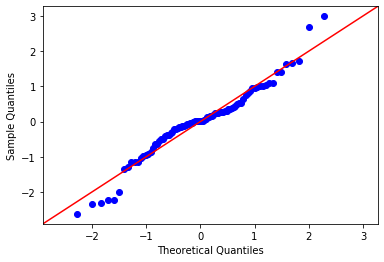

In [281]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Checking for Homoscedasticity

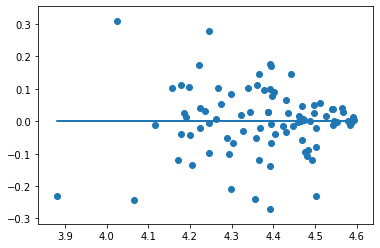

In [282]:
plt.scatter(model.predict(all_regents_grad_rate[x_cols]), model.resid)
plt.plot(model.predict(all_regents_grad_rate[x_cols]), [0 for i in range(len(all_regents_grad_rate))])

In [284]:
X = all_regents_grad_rate[['Common_Core_Algebra', 'Common_Core_English', 'U_S__History_and_Government']]
y = all_regents_grad_rate[['percent_graduated']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.010901228833902285
Test Mean Squarred Error: 0.011826720389683182


## Aggregated Data with All Independant Variables

In [285]:
final_df = pd.read_csv('all_multiple_regression.csv')
final_df = final_df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Common Core Algebra2', 'Common Core Geometry',
      'Global History and Geography', 'Biology', 'Earth Science','Chemistry', 'Physics', 'total_number_of_classes'])
final_df.columns

Index(['school_name', 'percent_with_no_valid_teaching_ceriticate',
       'percent_teaching_out_of_certificate',
       'percent_with_less_than_3_yrs_experience',
       'percent_with_masters_and_30yrs_or_Doctorate',
       'percent_taught_by_teachers_without_appropriate_certificate',
       'attendance', 'percent_graduated', 'Common Core Algebra',
       'Common Core English', 'U.S. History and Government'],
      dtype='object')

In [286]:
final_df.columns = [col.replace(' ', '_') for col in final_df.columns]
final_df.columns = [col.replace('.', '_') for col in final_df.columns]

In [287]:
final_df.columns

Index(['school_name', 'percent_with_no_valid_teaching_ceriticate',
       'percent_teaching_out_of_certificate',
       'percent_with_less_than_3_yrs_experience',
       'percent_with_masters_and_30yrs_or_Doctorate',
       'percent_taught_by_teachers_without_appropriate_certificate',
       'attendance', 'percent_graduated', 'Common_Core_Algebra',
       'Common_Core_English', 'U_S__History_and_Government'],
      dtype='object')

In [288]:
final_df

,school_name,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,percent_taught_by_teachers_without_appropriate_certificate,attendance,percent_graduated,Common_Core_Algebra,Common_Core_English,U_S__History_and_Government
0,PACE HIGH SCHOOL,0.0,24.0,12.0,47.0,19.0,90,79.3,73.6,94.9,94.4
1,MANHATTAN VILLAGE ACADEMY,0.0,12.0,19.0,38.0,8.0,98,96.6,96.1,100.0,99.2
2,MANHATTAN BRIDGES HIGH SCHOOL,0.0,6.0,13.0,68.0,6.0,92,81.3,83.6,82.5,87.1
3,ART AND DESIGN HIGH SCHOOL,2.0,14.0,13.0,63.0,14.0,89,81.0,83.3,93.0,87.4
4,CENTRAL PARK EAST HIGH SCHOOL,0.0,16.0,10.0,61.0,17.0,94,97.3,86.7,97.6,96.8
5,FREDERICK DOUGLASS ACADEMY,2.0,12.0,4.0,48.0,8.0,88,75.8,67.5,89.3,81.5
6,WESTCHESTER SQUARE ACADEMY,6.0,28.0,22.0,17.0,26.0,86,71.3,58.4,67.9,80.4
7,BELMONT PREPARATORY HIGH SCHOOL,3.0,31.0,10.0,45.0,28.0,88,87.8,66.1,79.6,94.4
8,FORDHAM HIGH SCHOOL FOR THE ARTS,11.0,33.0,48.0,7.0,28.0,92,92.1,61.0,75.5,66.8
9,DEWITT CLINTON HIGH SCHOOL,1.0,28.0,9.0,68.0,20.0,80,45.7,53.2,56.7,61.8


In [289]:
final_df = final_df.replace(0, 0.001)
final_df

,school_name,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,percent_taught_by_teachers_without_appropriate_certificate,attendance,percent_graduated,Common_Core_Algebra,Common_Core_English,U_S__History_and_Government
0,PACE HIGH SCHOOL,0.001,24.0,12.000,47.0,19.0,90,79.3,73.6,94.9,94.4
1,MANHATTAN VILLAGE ACADEMY,0.001,12.0,19.000,38.0,8.0,98,96.6,96.1,100.0,99.2
2,MANHATTAN BRIDGES HIGH SCHOOL,0.001,6.0,13.000,68.0,6.0,92,81.3,83.6,82.5,87.1
3,ART AND DESIGN HIGH SCHOOL,2.000,14.0,13.000,63.0,14.0,89,81.0,83.3,93.0,87.4
4,CENTRAL PARK EAST HIGH SCHOOL,0.001,16.0,10.000,61.0,17.0,94,97.3,86.7,97.6,96.8
5,FREDERICK DOUGLASS ACADEMY,2.000,12.0,4.000,48.0,8.0,88,75.8,67.5,89.3,81.5
6,WESTCHESTER SQUARE ACADEMY,6.000,28.0,22.000,17.0,26.0,86,71.3,58.4,67.9,80.4
7,BELMONT PREPARATORY HIGH SCHOOL,3.000,31.0,10.000,45.0,28.0,88,87.8,66.1,79.6,94.4
8,FORDHAM HIGH SCHOOL FOR THE ARTS,11.000,33.0,48.000,7.0,28.0,92,92.1,61.0,75.5,66.8
9,DEWITT CLINTON HIGH SCHOOL,1.000,28.0,9.000,68.0,20.0,80,45.7,53.2,56.7,61.8


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c245ad1d0>,
      dtype=object)

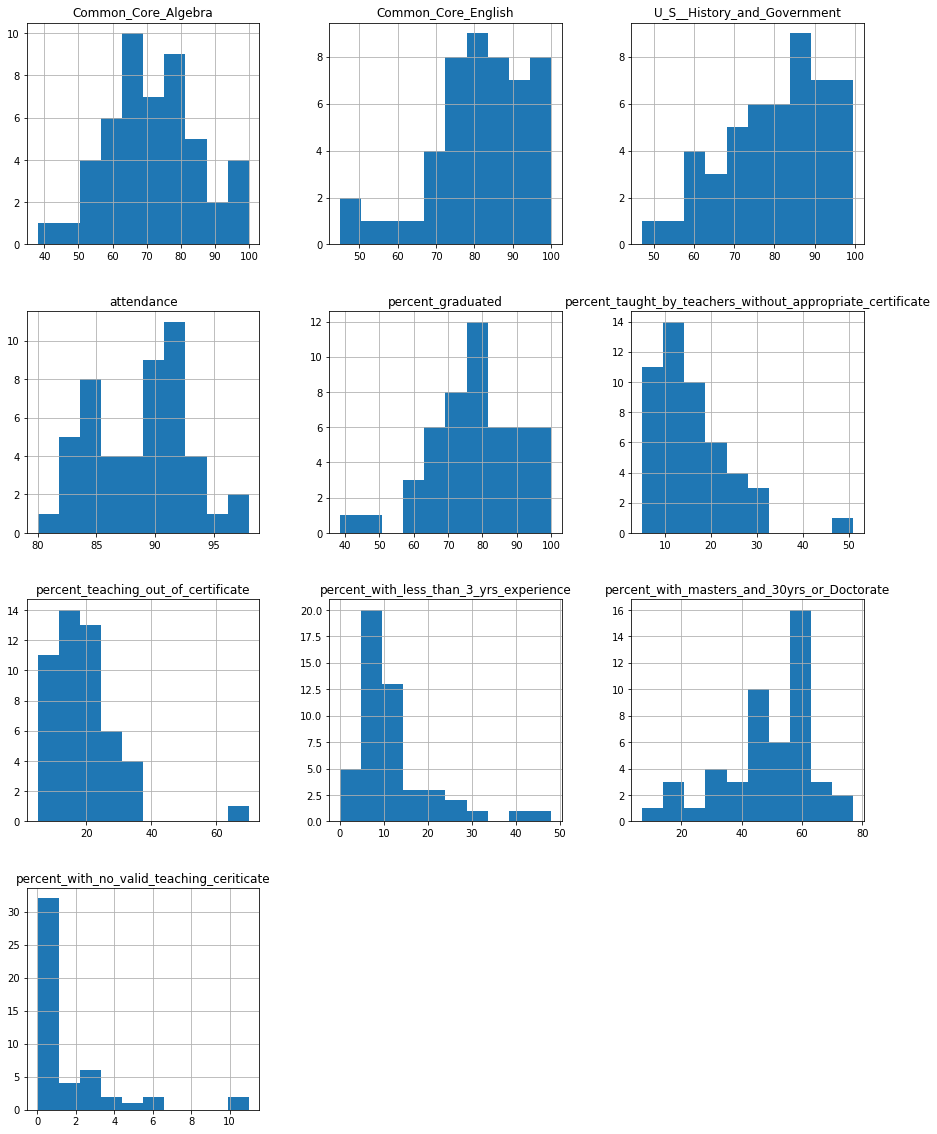

In [290]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
final_df.hist(ax = ax)

In [291]:
log_cols = ['percent_with_no_valid_teaching_ceriticate',
       'percent_teaching_out_of_certificate',
       'percent_with_less_than_3_yrs_experience',
       'percent_with_masters_and_30yrs_or_Doctorate',
       'percent_taught_by_teachers_without_appropriate_certificate',
       'attendance', 'percent_graduated', 'Common_Core_English', 'U_S__History_and_Government']
for cols in log_cols:
    final_df[cols] = np.log(final_df[cols])
final_df

,school_name,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,percent_taught_by_teachers_without_appropriate_certificate,attendance,percent_graduated,Common_Core_Algebra,Common_Core_English,U_S__History_and_Government
0,PACE HIGH SCHOOL,-6.907755,3.178054,2.484907,3.850148,2.944439,4.499810,4.373238,73.6,4.552824,4.547541
1,MANHATTAN VILLAGE ACADEMY,-6.907755,2.484907,2.944439,3.637586,2.079442,4.584967,4.570579,96.1,4.605170,4.597138
2,MANHATTAN BRIDGES HIGH SCHOOL,-6.907755,1.791759,2.564949,4.219508,1.791759,4.521789,4.398146,83.6,4.412798,4.467057
3,ART AND DESIGN HIGH SCHOOL,0.693147,2.639057,2.564949,4.143135,2.639057,4.488636,4.394449,83.3,4.532599,4.470495
4,CENTRAL PARK EAST HIGH SCHOOL,-6.907755,2.772589,2.302585,4.110874,2.833213,4.543295,4.577799,86.7,4.580877,4.572647
5,FREDERICK DOUGLASS ACADEMY,0.693147,2.484907,1.386294,3.871201,2.079442,4.477337,4.328098,67.5,4.492001,4.400603
6,WESTCHESTER SQUARE ACADEMY,1.791759,3.332205,3.091042,2.833213,3.258097,4.454347,4.266896,58.4,4.218036,4.387014
7,BELMONT PREPARATORY HIGH SCHOOL,1.098612,3.433987,2.302585,3.806662,3.332205,4.477337,4.475062,66.1,4.377014,4.547541
8,FORDHAM HIGH SCHOOL FOR THE ARTS,2.397895,3.496508,3.871201,1.945910,3.332205,4.521789,4.522875,61.0,4.324133,4.201703
9,DEWITT CLINTON HIGH SCHOOL,0.000000,3.332205,2.197225,4.219508,2.995732,4.382027,3.822098,53.2,4.037774,4.123903


In [293]:
outcome = "percent_graduated"
x_cols = ['percent_with_no_valid_teaching_ceriticate',
       'percent_teaching_out_of_certificate',
       'percent_with_less_than_3_yrs_experience',
       'percent_with_masters_and_30yrs_or_Doctorate',
       'percent_taught_by_teachers_without_appropriate_certificate',
       'attendance', 'Common_Core_Algebra',
       'Common_Core_English', 'U_S__History_and_Government']

In [294]:
for col in x_cols:
    final_df[col] = (final_df[col] - final_df[col].mean())/final_df[col].std()
final_df

,school_name,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,percent_taught_by_teachers_without_appropriate_certificate,attendance,percent_graduated,Common_Core_Algebra,Common_Core_English,U_S__History_and_Government
0,PACE HIGH SCHOOL,-1.130407,0.676364,0.245348,0.071514,0.636458,0.340237,4.373238,0.114674,0.942272,1.024339
1,MANHATTAN VILLAGE ACADEMY,-1.130407,-0.685377,0.558418,-0.409264,-1.164339,2.160260,4.570579,1.743900,1.239446,1.314817
2,MANHATTAN BRIDGES HIGH SCHOOL,-1.130407,-2.047118,0.299879,0.906944,-1.763251,0.809978,4.398146,0.838774,0.147340,0.552962
3,ART AND DESIGN HIGH SCHOOL,0.823729,-0.382537,0.299879,0.734201,0.000699,0.101437,4.394449,0.817051,0.827458,0.573100
4,CENTRAL PARK EAST HIGH SCHOOL,-1.130407,-0.120204,0.121136,0.661232,0.404903,1.269616,4.577799,1.063246,1.101535,1.171379
5,FREDERICK DOUGLASS ACADEMY,0.823729,-0.685377,-0.503114,0.119133,-1.164339,-0.140061,4.328098,-0.327027,0.596981,0.163758
6,WESTCHESTER SQUARE ACADEMY,1.106174,0.979205,0.658296,-2.228619,1.289447,-0.631402,4.266896,-0.985959,-0.958336,0.084171
7,BELMONT PREPARATORY HIGH SCHOOL,0.927971,1.179165,0.121136,-0.026842,1.443729,-0.140061,4.475062,-0.428402,-0.055809,1.024339
8,FORDHAM HIGH SCHOOL FOR THE ARTS,1.262007,1.301991,1.189802,-4.235548,1.443729,0.809978,4.522875,-0.797693,-0.356020,-1.001153
9,DEWITT CLINTON HIGH SCHOOL,0.645526,0.979205,0.049356,0.906944,0.743243,-2.177065,3.822098,-1.362491,-1.981692,-1.456807


In [295]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=final_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percent_graduated   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     18.97
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.18e-11
Time:                        12:03:55   Log-Likelihood:                 54.169
No. Observations:                  49   AIC:                            -88.34
Df Residuals:                      39   BIC:                            -69.42
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      4.3387      0.013    338.252      0.000       4.313       4.365
percent_with_no_valid_teaching_ceriticate                      0.0382      0.017      2.254      0.030       0.004       0.072
percent_teaching_out_of_certificate                           -0.0165      0.042     -0.396      0.694      -0.101       0.068
percent_with_less_than_3_yrs_experience                       -0.0086      0.015     -0.568      0.574      -0.039       0.022
percent_with_masters_and_30yrs_or_Doctorate                   -0.0313      0.018     -1.723      0.093      -0.068       0.005
percent_taught_by_teachers_without_appropriate_certificate    -0.0057      0.044     -0.131      0.897      -0.094       0.083
attendance                                                     0.0704      0.030      2.381      0.022       0.011       0.130
Common_Core_Algebra                                            0.0313      0.023      1.379      0.176      -0.015       0.077
Common_Core_English                                            0.0407      0.022      1.817      0.077      -0.005       0.086
U_S__History_and_Government                                    0.0513      0.021      2.483      0.017       0.010       0.093
==============================================================================
Omnibus:                        2.964   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.404
Skew:                          -0.041   Prob(JB):                        0.301
Kurtosis:                       4.082   Cond. No.                         8.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
outcome = "percent_graduated"
x_cols = ['percent_with_no_valid_teaching_ceriticate',
       'attendance', 'U_S__History_and_Government']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=final_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percent_graduated   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.87
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.67e-14
Time:                        11:46:33   Log-Likelihood:                 49.209
No. Observations:                  49   AIC:                            -90.42
Df Residuals:                      45   BIC:                            -82.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     4.3387      0.013    328.361      0.000       4.312       4.365
percent_with_no_valid_teaching_ceriticate     0.0547      0.015      3.774      0.000       0.026       0.084
attendance                                    0.1306      0.020      6.513      0.000       0.090       0.171
U_S__History_and_Government                   0.0590      0.019      3.054      0.004       0.020       0.098
==============================================================================
Omnibus:                       14.840   Durbin-Watson:                   2.526
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.297
Skew:                          -0.961   Prob(JB):                     2.37e-05
Kurtosis:                       5.596   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
final_df_model = final_df[['percent_graduated', 'percent_with_no_valid_teaching_ceriticate',
       'attendance', 'U_S__History_and_Government']]
final_df_model.columns

Index(['percent_graduated', 'percent_with_no_valid_teaching_ceriticate',
       'attendance', 'U_S__History_and_Government'],
      dtype='object')

In [238]:
X = final_df_model[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('percent_with_no_valid_teaching_ceriticate', 1.1805835338276343),
 ('attendance', 2.2575277898891337),
 ('U_S__History_and_Government', 2.0948789065239013)]

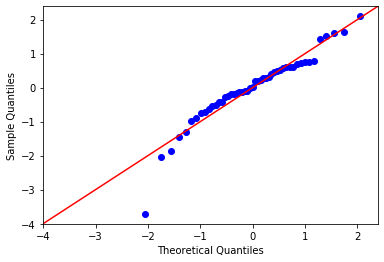

In [239]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

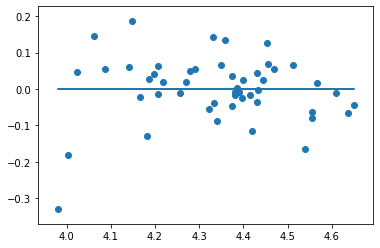

In [240]:
plt.scatter(model.predict(final_df[x_cols]), model.resid)
plt.plot(model.predict(final_df[x_cols]), [0 for i in range(len(final_df))])

In [246]:
X = final_df[['percent_with_no_valid_teaching_ceriticate','attendance', 'U_S__History_and_Government']]
y = final_df['percent_graduated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.008038773320173921
Test Mean Squarred Error: 0.008197436026363442
